# 6.15, 6.16 and 6.17

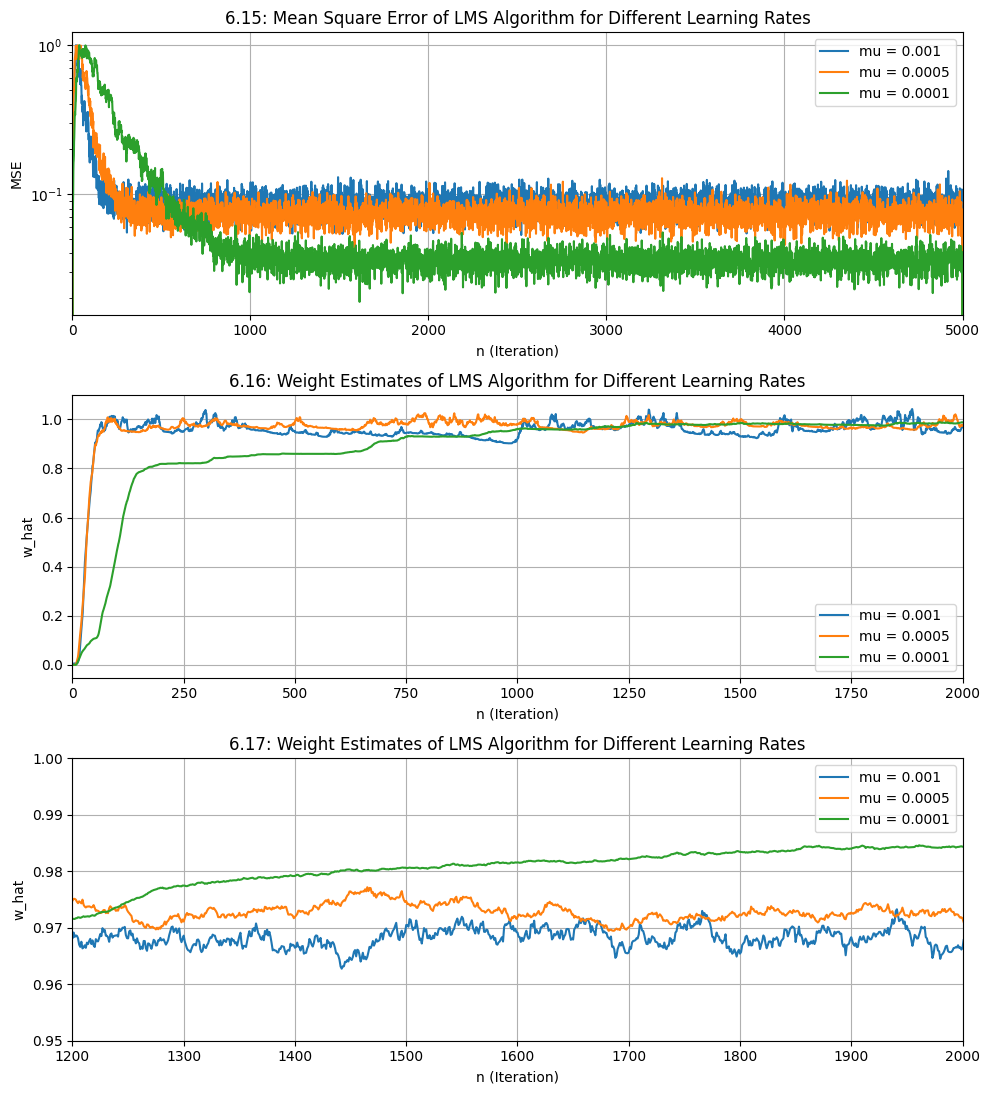

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a = -0.99
variance = 0.936

def lms_algorithm(mu, num_samples, seed=1, a = -0.99, sigma_v = np.sqrt(0.936)):
    if seed != 1:
        np.random.seed(seed)

    # Generate AR process data u(n) = -a * u(n-1) + v(n)
    u = np.zeros(num_samples)
    v = np.random.normal(0, sigma_v, num_samples)  # White noise

    for n in range(1, num_samples):
        u[n] = -a * u[n-1] + v[n]

    # LMS Algorithm to estimate parameter 'a'
    w_hat = np.zeros(num_samples)  # Initialize weight estimate
    w_actual = -a  # Actual value of -a for reference

    # Calculate mean square error
    mse = np.zeros(num_samples)
    w_hat_history = []
    for n in range(1, num_samples - 1):
        # Prediction error f(n) = u(n) - w_hat(n) * u(n-1)
        f_n = u[n] - w_hat[n] * u[n-1]
        # Weight update with overflow check
        w_hat[n + 1] = w_hat[n] + mu * u[n - 1] * f_n
        if abs(w_hat[n + 1]) > 1e150:
            w_hat[n + 1] = np.sign(w_hat[n + 1]) * 1e150
        # Mean square error
        mse[n] = f_n ** 2
        w_hat_history.append(w_hat[n])
    return mse, w_hat_history

mu_values = [0.001, 0.0005, 0.0001]
mse_all_runs = [[] for _ in range(len(mu_values))]
w_hat_all_runs = [[] for _ in range(len(mu_values))]

for _ in range(100):
    for (i, mu) in enumerate(mu_values):
        mse, w_hat_n = lms_algorithm(mu, 5000)
        mse_all_runs[i].append(mse)
        w_hat_all_runs[i].append(w_hat_n)

# Plot all three in the same chart
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Plot MSE
for i, mu in enumerate(mu_values):
    average_mse = np.mean(mse_all_runs[i], axis=0)
    average_mse = average_mse / np.max(average_mse)  # Normalize experimental MSE
    axs[0].plot(average_mse, label=f'mu = {mu}')

axs[0].set_xlim(0, 5000)
axs[0].set_xlabel('n (Iteration)')
axs[0].set_ylabel('MSE')
axs[0].set_yscale('log')
axs[0].legend()
axs[0].grid(True)
axs[0].set_title('6.15: Mean Square Error of LMS Algorithm for Different Learning Rates')

# Plot w_hat_history
for i, mu in enumerate(mu_values):    
    axs[1].plot(w_hat_all_runs[i][0], label=f'mu = {mu}')
    average_w_hat = np.mean(w_hat_all_runs[i], axis=0)
    axs[2].plot(average_w_hat, label=f'mu = {mu}')

axs[1].set_xlim(0, 2000)
axs[1].set_xlabel('n (Iteration)')
axs[1].set_ylabel('w_hat')
axs[1].legend()
axs[1].grid(True)
axs[1].set_title('6.16: Weight Estimates of LMS Algorithm for Different Learning Rates')

# zoom in further to see the convergence
axs[2].set_xlim(1200, 2000)
axs[2].set_ylim(0.95, 1)
axs[2].set_xlabel('n (Iteration)')
axs[2].set_ylabel('w_hat')
axs[2].legend()
axs[2].grid(True)
axs[2].set_title('6.17: Weight Estimates of LMS Algorithm for Different Learning Rates')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## unable to reproduce 6.18 properly

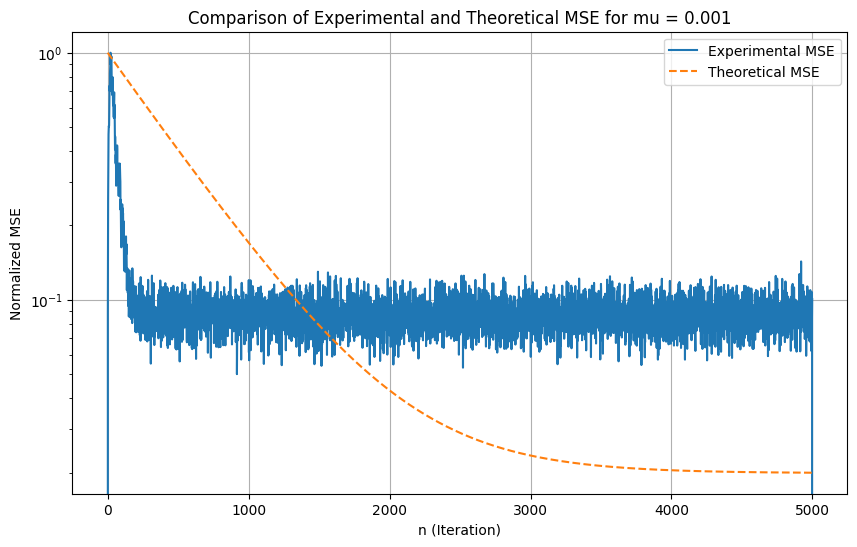

In [2]:
def theorethical_mse(mu, a, variance, num_samples):
    mse = np.zeros(num_samples)
    for i in range(num_samples):
        term1 = variance * (1 - a**2) * (1 + (mu / 2) * variance)
        term2 = variance * (a**2 + (mu / 2) * a**2 * variance - (mu / 2) * variance) * (1 - mu * variance)**(2 * i)
        mse[i] = term1 + term2
    return mse

# Plot theoretical MSE
mu_index = mu_values.index(0.001)

average_mse = np.mean(mse_all_runs[mu_index], axis=0)
average_mse = average_mse / np.max(average_mse)  # Normalize experimental MSE

theoretical_mse_history = theorethical_mse(0.001, a, variance, 5000)
theoretical_mse_history = theoretical_mse_history / np.max(theoretical_mse_history)  # Normalize theoretical MSE in the same way


plt.figure(figsize=(10, 6))
plt.plot(average_mse, label='Experimental MSE')
plt.plot(theoretical_mse_history, linestyle='--', label='Theoretical MSE')
plt.xlabel('n (Iteration)')
plt.ylabel('Normalized MSE')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.title('Comparison of Experimental and Theoretical MSE for mu = 0.001')
plt.show()